<a href="https://colab.research.google.com/github/NajlaYM/Masar/blob/main/Najla's_DataSET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data cleaning

In [88]:
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Specify the path to your CSV file
csv_file_path = '/content/Popular_Baby_Names.csv'

# Create a Pandas DataFrame from the CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("First few rows of the Popular Baby Namesn dataset:")
display(df.head())


First few rows of the Popular Baby Namesn dataset:


,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [96]:
!pip install seaborn

In [28]:
# get the column
df.columns

Index(['Year of Birth', 'G', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank'],
      dtype='object')

In [27]:
#rename columns
# df.rename(columns={'Gender':'G'}, inplace=True)
df.rename(columns={'Gender':'G'}, inplace=True)

In [34]:
# #check the null (missing values)
# df.isnull()
# d = 'Y'
# dd= ' Y'
# ddd= '  Y'
# d_1 = ''

In [35]:
#check how many missing values
df.isnull().sum()


Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

In [38]:
# #replace the missing value(s) with mean

# df['HbA1c'] = df['HbA1c'].fillna(df['HbA1c'].mean())
# #I DO NOT HAVE MISSING VALUES

In [44]:
# # dropping the missing values
# df_new = df.dropna()
# #I DO NOT HAVE MISSING VALUES

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57582 entries, 0 to 57581
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       57582 non-null  int64 
 1   Gender              57582 non-null  object
 2   Ethnicity           57582 non-null  object
 3   Child's First Name  57582 non-null  object
 4   Count               57582 non-null  int64 
 5   Rank                57582 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


In [46]:
#check the Rank column values
Rank= df['Rank'].unique()

In [47]:
Rank

array([ 75,  67,  42,  51,  53,  62,   8,  74,  71,  78,  73,  72,  77,
        60,   1,  70,  61,  65,  58,  41,  76,  68,  48,  55,  40,  66,
        64,  34,  44,  57,  63,  33,  31,  20,  69,  35,  13,  52,  59,
        39,   9,  27,  10,  56,  12,   2,  25,  18,  14,  38,  28,   6,
         3,  19,  45,  47,  11,  79,  17,  43,  80,  37,  81,  46,   5,
        22,  50,  21,  30,  24,  54,  15,  36,  23,   7,  16,  49,  29,
         4,  32,  26,  92,  90,  82,  91,  88,  89,  94,  83,  93,  84,
        87,  85,  86,  96,  97,  95,  99,  98, 100, 101, 102])

In [49]:
#replace the white spaces
df.Gender = df.Gender.str.replace('Y ', 'Y')
df.Gender = df.Gender.str.replace('N ', 'N')

In [59]:
df_2 = df['Rank']>50

In [64]:
df_2.describe()

count     18053
unique        2
top        True
freq      10428
Name: Rank, dtype: object

In [62]:
# check for duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49507    False
49508    False
49509    False
49510    False
49511    False
Length: 18053, dtype: bool

In [63]:
#remove duplication

df = df.drop_duplicates()

In [65]:
#saving the new dataframe into a csv file

df.to_csv('Najla_masar.csv')

Data procsseing

In [101]:
# del df['Year of Birth']

In [102]:
df.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [83]:
# Replace 'F' with 0 and 'M' with 1 in the 'Gender' column
df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})

In [85]:
df.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,0,HISPANIC,GERALDINE,13,75
1,2011,0,HISPANIC,GIA,21,67
2,2011,0,HISPANIC,GIANNA,49,42
3,2011,0,HISPANIC,GISELLE,38,51
4,2011,0,HISPANIC,GRACE,36,53


data visualization

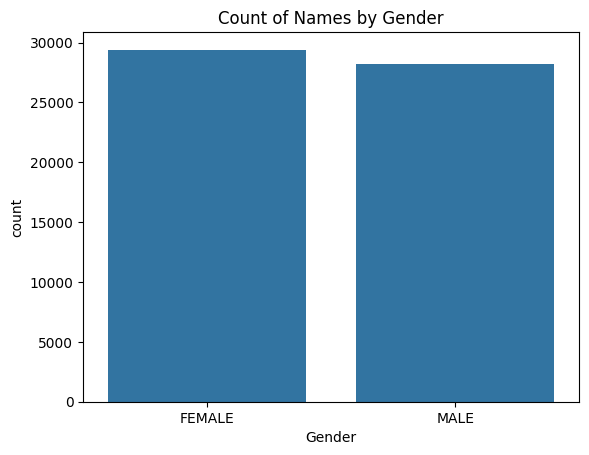

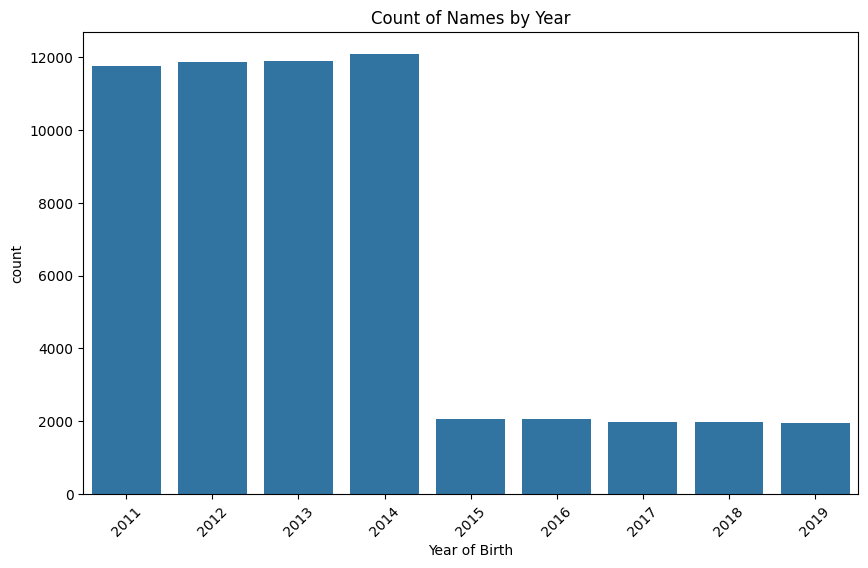

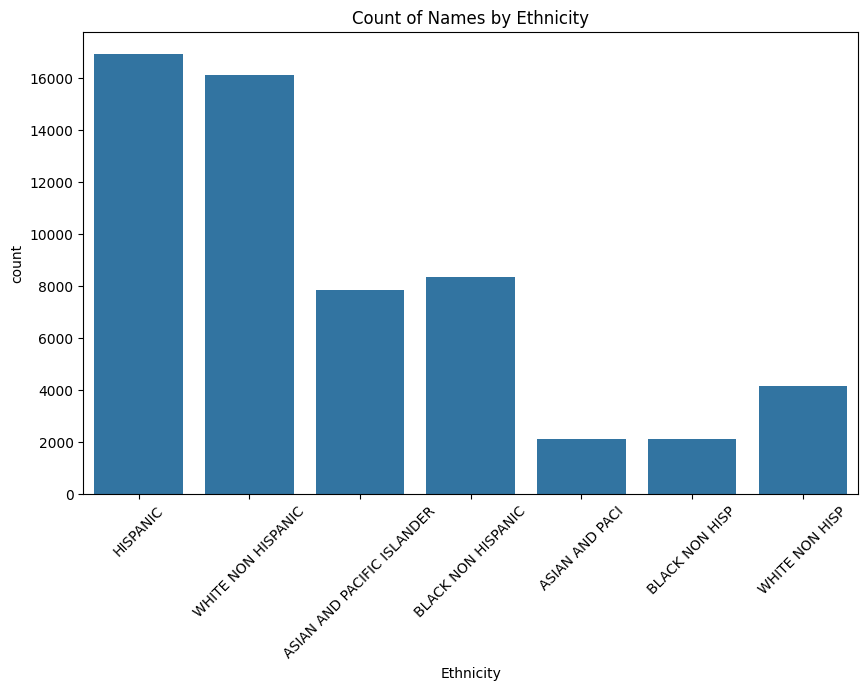

In [104]:
import matplotlib.pyplot as plt
# Plot the count of names by gender
sns.countplot(data=df, x='Gender')
plt.title('Count of Names by Gender')
plt.show()

# Plot the count of names by year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year of Birth')
plt.title('Count of Names by Year')
plt.xticks(rotation=45)
plt.show()

# Plot the count of names by ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ethnicity')
plt.title('Count of Names by Ethnicity')
plt.xticks(rotation=45)
plt.show()

<ipython-input-105-4f9beefad9d0>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




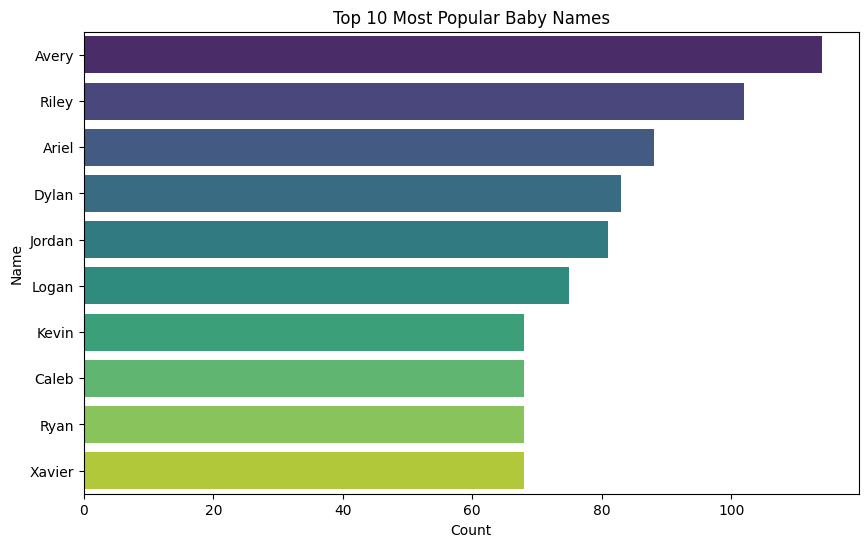

In [105]:
# Get the top 10 most popular names
top_10_names = df['Child\'s First Name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_names.values, y=top_10_names.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top 10 Most Popular Baby Names')
plt.show()


<ipython-input-106-2fdb635f6712>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



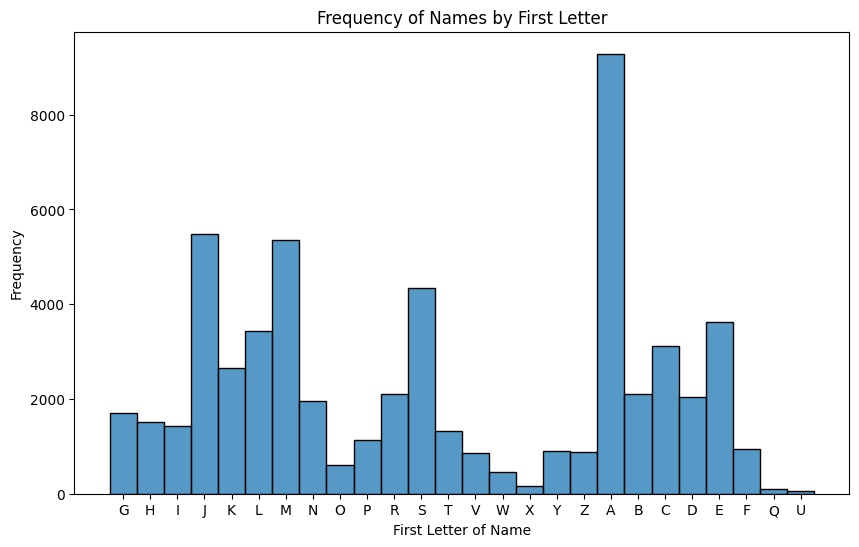

In [106]:
# Extract the first letter of each name
df['First Letter'] = df['Child\'s First Name'].str[0]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='First Letter', discrete=True, multiple='stack', palette='muted')
plt.xlabel('First Letter of Name')
plt.ylabel('Frequency')
plt.title('Frequency of Names by First Letter')
plt.show()
